In [1]:
import os
import camsym
import imaging as img
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import glob
import scipy as sc
%matplotlib inline
import inspect
#%config InlineBackend.figure_formats = ["retina"]
from scipy.optimize import curve_fit
import microfit.database as db
import microfit.hdr as hdr
import microfit.chemiluminescence as chem
import microfit.pyrometry as pyro
#import microfit.analysis as anls
from microfit import analysis
from scipy import stats
from matplotlib.pyplot import figure
import pywt as pw
figure(num=None, figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')
import math
#from scipy import opQtimize as opt
from importlib import reload
import matplotlib.gridspec as gsp
from matplotlib.ticker import MultipleLocator
import matplotlib as mpl
import warnings
warnings.filterwarnings(action='once')
from operator import itemgetter
from scipy import interpolate
from scipy.interpolate import UnivariateSpline
from PyAstronomy import pyasl
import statistics as ss
from scipy.signal import lfilter
from sklearn.preprocessing import normalize
from scipy.signal import find_peaks, peak_prominences
import yapf
#warnings.filterwarnings(action='error')

C:\Users\Navid\Miniconda3\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
C:\Users\Navid\Miniconda3\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


<Figure size 640x480 with 0 Axes>

In [2]:
plt.style.use('../manuscript.mplstyle')
plt.rcParams['figure.figsize']

[8.0, 5.5]

In [3]:
show = True

In [4]:
xlsx = '../index_2018_02_PRF_data.xlsx'
df = pd.read_excel(xlsx)

C:\Users\Navid\Miniconda3\lib\site-packages\xlrd\xlsx.py:266: PendingDeprecationWarning: This method will be removed in future versions.  Use 'tree.iter()' or 'list(tree.iter())' instead.
  for elem in self.tree.iter() if Element_has_iter else self.tree.getiterator():


#### Select Data for Gaseous Fuels

In [5]:
cases = np.unique(df.case)
cases =['2020_01_06_air_130.34psig_12.37O2_1mm'] +['2020_01_06_isooctane_130.34psig_12.37O2_1mm']
cases

['2020_01_06_air_130.34psig_12.37O2_1mm',
 '2020_01_06_isooctane_130.34psig_12.37O2_1mm']

In [6]:
ix = df.case.isin(cases)
rp = db.Database(df[ix], verbosity=2)

### Assignment of Temperature Profiles

In [7]:
seq1 = rp.find_sequence_by('case', phi=0)
seq1

{'2020_01_06_air_130.34psig_12.37O2_1mm': [1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13]}

In [8]:
seq2 = rp.find_sequence_by('case', phi=1)
seq2

{'2020_01_06_isooctane_130.34psig_12.37O2_1mm': [15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27]}

In [9]:
folder_name1 = str(cases[0])
folder_name2 = str(cases[1])
print(folder_name1,',', folder_name2)

2020_01_06_air_130.34psig_12.37O2_1mm , 2020_01_06_isooctane_130.34psig_12.37O2_1mm


In [10]:
reload.__name__

'reload'

In [11]:
_ = reload(pyro)
_ = reload(analysis)

In [12]:
x_ext, x_max, x_ign = rp.get_x_flames(seq1, snr=30)

Case: 2020_01_06_air_130.34psig_12.37O2_1mm (C:\Users\Navid\1Notebooks_master\fuels\2020_01_06_air_130.34psig_12.37O2_1mm)
 * get_x_flame -> air_d76.2_v2.0_phi0.00_ps130.34_pa130.000000_pref5.930000_(ve160_phie0.65)
    <load_raw> ... generate HDR calibration image: cube0_raw1.tif
    <load_raw> ... generate HDR image: air_d76.2_v2.0_phi0.00_ps130.34_pa130.000000_pref5.930000_(ve160_phie0.65)_raw1.tif
    <perform_analysis> ... creating new `Fourier` object
rejecting apparent diameter: 68.992
0.4921875 0.4921875
rejecting apparent diameter: 69.544
0.48828125 0.48828125
rejecting apparent diameter: 69.544
0.48828125 0.48828125
    <extract_filament> ... extracting `Fourier` filament
    <extract_temperature> ... creating `PyroFrame` object
    <load_raw> ... generate HDR calibration image: cube0_raw2.tif
    <load_raw> ... generate HDR image: air_d76.2_v2.0_phi0.00_ps130.34_pa130.000000_pref5.930000_(ve160_phie0.65)_raw2.tif
    <perform_analysis> ... creating new `Fourier` object
    <

    <perform_analysis> ... creating new `Fourier` object
    <extract_filament> ... extracting `Fourier` filament
    <extract_flame> ... creating `FlameFrame` object
 * get_x_flame -> air_d76.2_v9.0_phi0.00_ps130.34_pa130.000000_pref5.930000_(ve160_phie0.65)
    <load_raw> ... generate HDR image: air_d76.2_v9.0_phi0.00_ps130.34_pa130.000000_pref5.930000_(ve160_phie0.65)_raw1.tif
    <perform_analysis> ... creating new `Fourier` object
rejecting apparent diameter: 70.105
0.484375 0.484375
rejecting apparent diameter: 69.544
0.48828125 0.48828125
rejecting apparent diameter: 69.544
0.48828125 0.48828125
    <extract_filament> ... extracting `Fourier` filament
    <extract_temperature> ... creating `PyroFrame` object
    <load_raw> ... generate HDR image: air_d76.2_v9.0_phi0.00_ps130.34_pa130.000000_pref5.930000_(ve160_phie0.65)_raw2.tif
    <perform_analysis> ... creating new `Fourier` object
    <extract_filament> ... extracting `Fourier` filament
    <extract_flame> ... creating `Flam

In [13]:
_, _ = rp.extract_temperatures(seq1, snr=30)

Case: 2020_01_06_air_130.34psig_12.37O2_1mm (C:\Users\Navid\1Notebooks_master\fuels\2020_01_06_air_130.34psig_12.37O2_1mm)
 * extract_temperature -> air_d76.2_v2.0_phi0.00_ps130.34_pa130.000000_pref5.930000_(ve160_phie0.65)
    <extract_temperature> ... returning stored pyrometry results
 * extract_temperature -> air_d76.2_v2.5_phi0.00_ps130.34_pa130.000000_pref5.930000_(ve160_phie0.65)
    <extract_temperature> ... returning stored pyrometry results
 * extract_temperature -> air_d76.2_v2.8_phi0.00_ps130.34_pa130.000000_pref5.930000_(ve160_phie0.65)
    <extract_temperature> ... returning stored pyrometry results
 * extract_temperature -> air_d76.2_v3.0_phi0.00_ps130.34_pa130.000000_pref5.930000_(ve160_phie0.65)
    <extract_temperature> ... returning stored pyrometry results
 * extract_temperature -> air_d76.2_v3.5_phi0.00_ps130.34_pa130.000000_pref5.930000_(ve160_phie0.65)
    <extract_temperature> ... returning stored pyrometry results
 * extract_temperature -> air_d76.2_v4.0_phi0.0

In [14]:
_ = reload(chem)
_ = reload(analysis)

In [15]:
frames1 = rp.extract_flames(seq1, camera=2)  #,force=True)

Case: 2020_01_06_air_130.34psig_12.37O2_1mm (C:\Users\Navid\1Notebooks_master\fuels\2020_01_06_air_130.34psig_12.37O2_1mm)
 * extract_flame -> air_d76.2_v2.0_phi0.00_ps130.34_pa130.000000_pref5.930000_(ve160_phie0.65)
    <extract_temperature> ... returning stored pyrometry results
    <extract_filament> ... returning buffered filament
    <extract_flame> ... creating `FlameFrame` object
 * extract_flame -> air_d76.2_v2.5_phi0.00_ps130.34_pa130.000000_pref5.930000_(ve160_phie0.65)
    <extract_temperature> ... returning stored pyrometry results
    <extract_filament> ... returning buffered filament
    <extract_flame> ... creating `FlameFrame` object
 * extract_flame -> air_d76.2_v2.8_phi0.00_ps130.34_pa130.000000_pref5.930000_(ve160_phie0.65)
    <extract_temperature> ... returning stored pyrometry results
    <extract_filament> ... returning buffered filament
    <extract_flame> ... creating `FlameFrame` object
 * extract_flame -> air_d76.2_v3.0_phi0.00_ps130.34_pa130.000000_pref5.93

In [16]:
_ = reload(pyro)
_ = reload(analysis)

In [17]:
x_ext, x_max, x_ign = rp.get_x_flames(seq2,snr=30)

Case: 2020_01_06_isooctane_130.34psig_12.37O2_1mm (C:\Users\Navid\1Notebooks_master\fuels\2020_01_06_isooctane_130.34psig_12.37O2_1mm)
 * get_x_flame -> isooctane_d76.2_v2.0_phi1.00_ps130.34_pa130.000000_pref5.930000_(ve160_phie0.65)
    <load_raw> ... generate HDR calibration image: cube0_raw1.tif
    <load_raw> ... generate HDR image: isooctane_d76.2_v2.0_phi1.00_ps130.34_pa130.000000_pref5.930000_(ve160_phie0.65)_raw1.tif
    <perform_analysis> ... creating new `Fourier` object
rejecting apparent diameter: 68.992
0.4921875 0.4921875
rejecting apparent diameter: 69.544
0.48828125 0.48828125
rejecting apparent diameter: 69.544
0.48828125 0.48828125
    <extract_filament> ... extracting `Fourier` filament
    <extract_temperature> ... creating `PyroFrame` object
    <load_raw> ... generate HDR calibration image: cube0_raw2.tif
    <load_raw> ... generate HDR image: isooctane_d76.2_v2.0_phi1.00_ps130.34_pa130.000000_pref5.930000_(ve160_phie0.65)_raw2.tif
    <perform_analysis> ... creat

    <perform_analysis> ... creating new `Fourier` object
rejecting apparent diameter: 69.544
0.48828125 0.48828125
rejecting apparent diameter: 70.105
0.484375 0.484375
rejecting apparent diameter: 70.105
0.484375 0.484375
    <extract_filament> ... extracting `Fourier` filament
    <extract_temperature> ... creating `PyroFrame` object
    <load_raw> ... generate HDR image: isooctane_d76.2_v8.0_phi1.00_ps130.34_pa130.000000_pref5.930000_(ve160_phie0.65)_raw2.tif
    <perform_analysis> ... creating new `Fourier` object
    <extract_filament> ... extracting `Fourier` filament
    <extract_flame> ... creating `FlameFrame` object
 * get_x_flame -> isooctane_d76.2_v9.0_phi1.00_ps130.34_pa130.000000_pref5.930000_(ve160_phie0.65)
    <load_raw> ... generate HDR image: isooctane_d76.2_v9.0_phi1.00_ps130.34_pa130.000000_pref5.930000_(ve160_phie0.65)_raw1.tif
    <perform_analysis> ... creating new `Fourier` object
rejecting apparent diameter: 70.105
0.484375 0.484375
rejecting apparent diameter

In [18]:
_, _ = rp.extract_temperatures(seq2,snr=30)

Case: 2020_01_06_isooctane_130.34psig_12.37O2_1mm (C:\Users\Navid\1Notebooks_master\fuels\2020_01_06_isooctane_130.34psig_12.37O2_1mm)
 * extract_temperature -> isooctane_d76.2_v2.0_phi1.00_ps130.34_pa130.000000_pref5.930000_(ve160_phie0.65)
    <extract_temperature> ... returning stored pyrometry results
 * extract_temperature -> isooctane_d76.2_v2.5_phi1.00_ps130.34_pa130.000000_pref5.930000_(ve160_phie0.65)
    <extract_temperature> ... returning stored pyrometry results
 * extract_temperature -> isooctane_d76.2_v2.8_phi1.00_ps130.34_pa130.000000_pref5.930000_(ve160_phie0.65)
    <extract_temperature> ... returning stored pyrometry results
 * extract_temperature -> isooctane_d76.2_v3.0_phi1.00_ps130.34_pa130.000000_pref5.930000_(ve160_phie0.65)
    <extract_temperature> ... returning stored pyrometry results
 * extract_temperature -> isooctane_d76.2_v3.5_phi1.00_ps130.34_pa130.000000_pref5.930000_(ve160_phie0.65)
    <extract_temperature> ... returning stored pyrometry results
 * ex

In [19]:
_ = reload(chem)
_ = reload(analysis)

In [20]:
frames2 = rp.extract_flames(seq2,camera=2,snr=30) #,force=True)

Case: 2020_01_06_isooctane_130.34psig_12.37O2_1mm (C:\Users\Navid\1Notebooks_master\fuels\2020_01_06_isooctane_130.34psig_12.37O2_1mm)
 * extract_flame -> isooctane_d76.2_v2.0_phi1.00_ps130.34_pa130.000000_pref5.930000_(ve160_phie0.65)
    <extract_temperature> ... returning stored pyrometry results
    <extract_filament> ... returning buffered filament
    <extract_flame> ... creating `FlameFrame` object
 * extract_flame -> isooctane_d76.2_v2.5_phi1.00_ps130.34_pa130.000000_pref5.930000_(ve160_phie0.65)
    <extract_temperature> ... returning stored pyrometry results
    <extract_filament> ... returning buffered filament
    <extract_flame> ... creating `FlameFrame` object
 * extract_flame -> isooctane_d76.2_v2.8_phi1.00_ps130.34_pa130.000000_pref5.930000_(ve160_phie0.65)
    <extract_temperature> ... returning stored pyrometry results
    <extract_filament> ... returning buffered filament
    <extract_flame> ... creating `FlameFrame` object
 * extract_flame -> isooctane_d76.2_v3.0_ph

In [21]:
n_case1 = len(seq1)
n_vels1 = [len(seq1[k]) for k in seq1][0]
n_case1, n_vels1

(1, 13)

In [22]:
test1 = frames1[folder_name1]

In [23]:
vel1 = rp.get_entries(seq1, 'v')

In [24]:
title1 = list(frames1.keys())

In [25]:
rp.get_entries(seq2, 'v')

{'2020_01_06_isooctane_130.34psig_12.37O2_1mm': [2.0,
  2.5,
  2.8,
  3.0,
  3.5,
  4.0,
  5.0,
  6.0,
  7.0,
  8.0,
  9.0,
  10.0,
  11.0]}

In [26]:
v_f1=vel1[folder_name1]

In [27]:
n_case2 = len(seq2)
n_vels2 = [len(seq2[k]) for k in seq2][0]
n_case2, n_vels2

(1, 13)

In [28]:
test2 = frames2[folder_name2]

In [29]:
title2 = list(frames2.keys())

In [30]:
vel2 = rp.get_entries(seq2, 'v')

In [31]:
v_f2=vel2[folder_name2]

In [32]:
# Moving average
def M_avg(a, b):
    c = []
    for i in range(len(a)):
        if i + b < len(a):
            c.append(sum(a[i:i + b]) / b)
        else:
            break
    return np.asarray(c), np.arange(len(c))


#normalize the data (0:1)
def norm(a):
    b = 2 * (a - np.amin(a)) / (np.amax(a) - np.amin(a)) - 1
    return b


#Zero corssing
def zero_cross(array):
    a = np.argmin(array)
    zero_crossings = np.where(np.diff(np.sign(array[a:])))[0]
    first_zero = zero_crossings[0]
    final = first_zero + a
    return final

#### Mask function

In [33]:
IDS = camsym.Camera.load('3240CP-M.yml')

In [34]:
from scipy.signal import gaussian
from scipy.stats import lognorm

In [35]:
def lognormmask(b,a):
    y = np.linspace(lognorm.ppf(0.001, a),
                lognorm.ppf(0.99, a), b)
    x = lognorm.pdf(y, a)
    xx = (x-np.amin(x))/(np.amax(x)-np.amin(x))
    xx1 = xx[::-1]
    return xx1

In [36]:
def mask(Channel, Image, X):
    ede=15
    ys = Channel.pos.tube_outline(X)
    IDb = int(np.mean(ys['IDb'])) - ede
    ODb = int(np.mean(ys['ODb'])) - ede
    DIF = ODb - IDb
    msk = lognormmask(DIF,0.5)
    f = Image.copy()
    f[IDb:ODb, :] = np.repeat(msk[:, np.newaxis], f.shape[1], axis=1)
    f[ODb:, :] = f[:IDb, :] = 0
    new = np.multiply(f, Image)
    return new

Case: 2020_01_06_isooctane_130.34psig_12.37O2_1mm (C:\Users\Navid\1Notebooks_master\fuels\2020_01_06_isooctane_130.34psig_12.37O2_1mm)
 * perform_analysis -> isooctane_d76.2_v2.0_phi1.00_ps130.34_pa130.000000_pref5.930000_(ve160_phie0.65)
    <perform_analysis> ... creating new `Fourier` object


C:\Users\Navid\Miniconda3\lib\site-packages\microfit\analysis.py:480: PendingDeprecationWarning: ``without_filament`` retained for debugging purposes
  PendingDeprecationWarning)
C:\Users\Navid\Miniconda3\lib\site-packages\microfit\analysis.py:470: PendingDeprecationWarning: ``synthetic_filament`` retained for debugging purposes
  PendingDeprecationWarning)


Case: 2020_01_06_isooctane_130.34psig_12.37O2_1mm (C:\Users\Navid\1Notebooks_master\fuels\2020_01_06_isooctane_130.34psig_12.37O2_1mm)
 * perform_analysis -> isooctane_d76.2_v2.5_phi1.00_ps130.34_pa130.000000_pref5.930000_(ve160_phie0.65)
    <perform_analysis> ... creating new `Fourier` object
Case: 2020_01_06_isooctane_130.34psig_12.37O2_1mm (C:\Users\Navid\1Notebooks_master\fuels\2020_01_06_isooctane_130.34psig_12.37O2_1mm)
 * perform_analysis -> isooctane_d76.2_v2.8_phi1.00_ps130.34_pa130.000000_pref5.930000_(ve160_phie0.65)
    <perform_analysis> ... creating new `Fourier` object
Case: 2020_01_06_isooctane_130.34psig_12.37O2_1mm (C:\Users\Navid\1Notebooks_master\fuels\2020_01_06_isooctane_130.34psig_12.37O2_1mm)
 * perform_analysis -> isooctane_d76.2_v3.0_phi1.00_ps130.34_pa130.000000_pref5.930000_(ve160_phie0.65)
    <perform_analysis> ... creating new `Fourier` object
Case: 2020_01_06_isooctane_130.34psig_12.37O2_1mm (C:\Users\Navid\1Notebooks_master\fuels\2020_01_06_isooctane_1

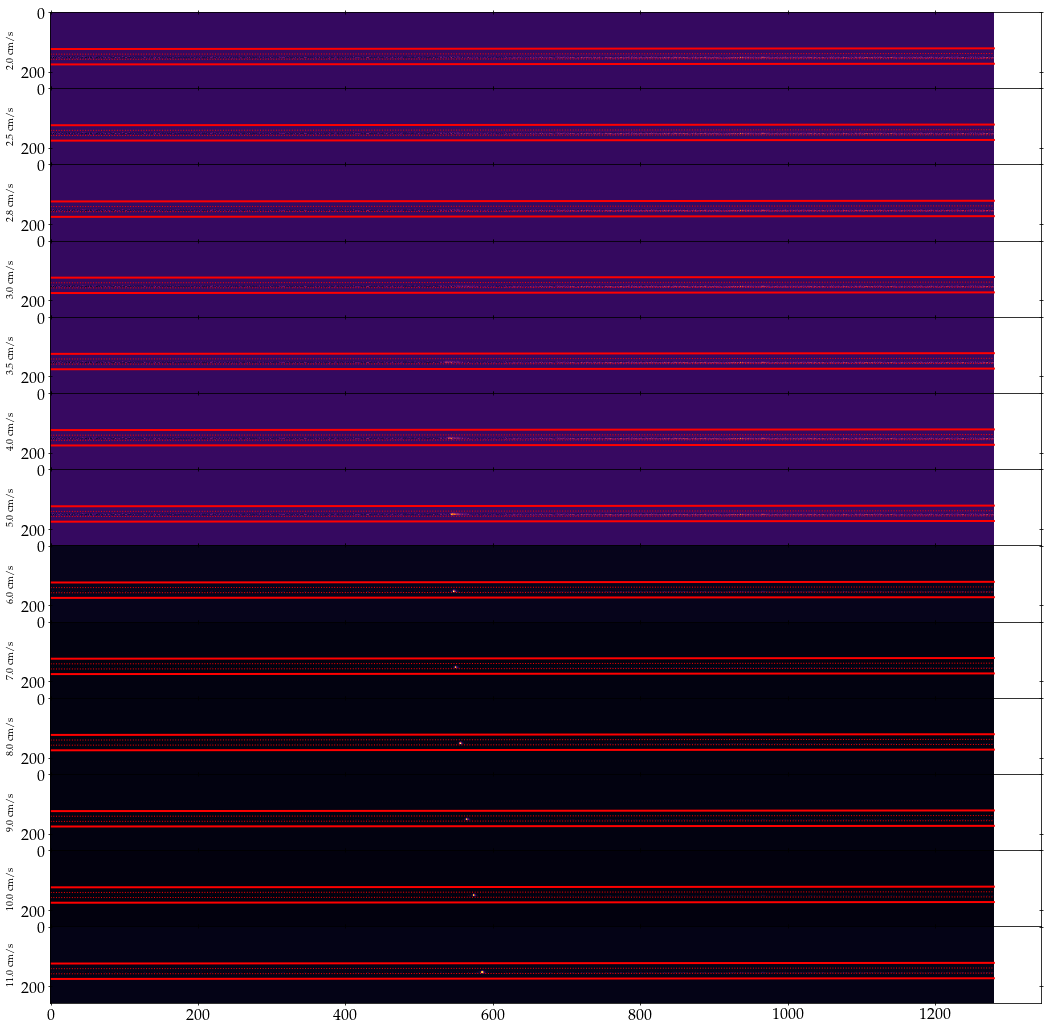

In [37]:
ch = 'f430x10h'
h = cases[1] #fuel 
xs = np.array([0,1280])
fig, ax = plt.subplots(len(v_f2), 1, sharex=True, sharey=True, figsize=(16,16))
for i in range(len(v_f2)):
    seq3 = rp.find_sequence_by('case',v=v_f2[i], phi =1)
    fft2 = rp.perform_analyses(seq3, camera=2, align=False)
    ggg = fft2[h]
    images = {'difference': ggg.without_filament[ch]}
    hdr3 = rp.get_entries(seq3,'hdr2')
    ys = hdr3[h].pos.tube_outline(xs)
    ax[i].imshow(mask(hdr3[h],images['difference'],xs), aspect='auto')
    ax[i].set_ylabel(str(v_f2[i])+' cm/s',fontsize = 10)
    for pos in ['ODt','ODb']:
        ax[i].plot(xs,ys[pos],'r-',linewidth=2)
    for pos in ['IDt','IDb']:
        ax[i].plot(xs,ys[pos],'r:',linewidth=1)
    

In [38]:
ch = 'f430x10h'
h = cases[1]
print(h)#fuel
xs = np.array([0, 1280])
start_position = 350
end_position =500
fig, ax = plt.subplots(6,
                       1,
                       sharex=True,
                       sharey=True,
                       figsize=(30, 50), dpi=500)
for i in range(6):
    im_a = img.HyperStack.load(
        fname=cases[0]+'.h5',
        path='../fuels',
        group='tube_v' + str(v_f2[i]) + ':cam2')
    im = img.HyperStack.load(
        fname=cases[1]+'.h5',
        path='../fuels',
        group='tube_v' + str(v_f2[i]) + ':cam2')
    hdrm = img.HDR.module('mle', ldr='predicted', camera=IDS)
    hdr_mle, var_mle = hdrm.photon_flux(im)
    seq3 = rp.find_sequence_by('case', v=v_f2[i], phi=1)
    hdr_mle_a, var_mle_a = hdrm.photon_flux(im_a)
    seq3_a = rp.find_sequence_by('case', v=v_f2[i], phi=0)
    images = {'difference': hdr_mle['f430x10h']}
    hdr3 = rp.get_entries(seq3, 'hdr2')
    ys = hdr3[h].pos.tube_outline(xs)
    ax[i].imshow(mask(hdr3[h], images['difference'][:,start_position:end_position],xs), aspect='auto')
    ax[i].set_ylabel(str(v_f2[i]) + ' cm/s', fontsize=10)
    for pos in ['ODt', 'ODb']:
        ax[i].plot(np.array([0, end_position-start_position]), ys[pos], 'r-', linewidth=2)
    for pos in ['IDt', 'IDb']:
        ax[i].plot(np.array([0, end_position-start_position]), ys[pos], 'r:', linewidth=1)

2020_01_06_isooctane_130.34psig_12.37O2_1mm
pressure 130.34 psig
pressure 130.34 psig


c:\users\navid\imaging\imaging\tools\unit_handling.py:68: UserWarning: undefined unit for keyword `pressure`: `'psig' is not defined in the unit registry`
  warnings.warn(msg)
c:\users\navid\imaging\imaging\processors.py:251: PendingDeprecationWarning: Assign LDR object instead of LDR module name
  PendingDeprecationWarning)


pressure 130.34 psig
pressure 130.34 psig
pressure 130.34 psig
pressure 130.34 psig
pressure 130.34 psig
pressure 130.34 psig
pressure 130.34 psig
pressure 130.34 psig
pressure 130.34 psig
pressure 130.34 psig
pressure 130.34 psig
pressure 130.34 psig
pressure 130.34 psig
pressure 130.34 psig
pressure 130.34 psig
pressure 130.34 psig
pressure 130.34 psig
pressure 130.34 psig
pressure 130.34 psig
pressure 130.34 psig
pressure 130.34 psig
pressure 130.34 psig
pressure 130.34 psig
pressure 130.34 psig
pressure 130.34 psig
pressure 130.34 psig
pressure 130.34 psig
pressure 130.34 psig
pressure 130.34 psig
pressure 130.34 psig
pressure 130.34 psig
pressure 130.34 psig
pressure 130.34 psig
pressure 130.34 psig
pressure 130.34 psig
pressure 130.34 psig
pressure 130.34 psig
pressure 130.34 psig
pressure 130.34 psig
pressure 130.34 psig
pressure 130.34 psig
pressure 130.34 psig
pressure 130.34 psig
pressure 130.34 psig
pressure 130.34 psig
pressure 130.34 psig


#### `h5` file content

In [39]:
import h5py
f = h5py.File(
    '../fuels/'+cases[1]+'.h5',
    'r')

In [40]:
import h5py
f = h5py.File(
   '../fuels/'+cases[1]+'.h5',
    'r')


def printname(name):
    print(name)


# f.visit(printname)

#### Load data (Images)

In [41]:
im = img.HyperStack.load(
    fname=cases[1]+'.h5',
    path='../fuels',
    group='tube_v3.5:cam2')

pressure 130.34 psig


In [42]:
im.channels

c:\users\navid\imaging\imaging\objects.py:105: DeprecationWarning: Deprecated: use ``.keys()`` to access channel names
  DeprecationWarning)


['f394x10h', 'f430x10h']

### Debevec Algorithm

Case: 2020_01_06_isooctane_130.34psig_12.37O2_1mm (C:\Users\Navid\1Notebooks_master\fuels\2020_01_06_isooctane_130.34psig_12.37O2_1mm)
 * perform_analysis -> isooctane_d76.2_v2.0_phi1.00_ps130.34_pa130.000000_pref5.930000_(ve160_phie0.65)
    <perform_analysis> ... returning buffered `Fourier` object
Case: 2020_01_06_isooctane_130.34psig_12.37O2_1mm (C:\Users\Navid\1Notebooks_master\fuels\2020_01_06_isooctane_130.34psig_12.37O2_1mm)
 * perform_analysis -> isooctane_d76.2_v2.5_phi1.00_ps130.34_pa130.000000_pref5.930000_(ve160_phie0.65)
    <perform_analysis> ... returning buffered `Fourier` object
Case: 2020_01_06_isooctane_130.34psig_12.37O2_1mm (C:\Users\Navid\1Notebooks_master\fuels\2020_01_06_isooctane_130.34psig_12.37O2_1mm)
 * perform_analysis -> isooctane_d76.2_v2.8_phi1.00_ps130.34_pa130.000000_pref5.930000_(ve160_phie0.65)
    <perform_analysis> ... returning buffered `Fourier` object
Case: 2020_01_06_isooctane_130.34psig_12.37O2_1mm (C:\Users\Navid\1Notebooks_master\fuels\2020

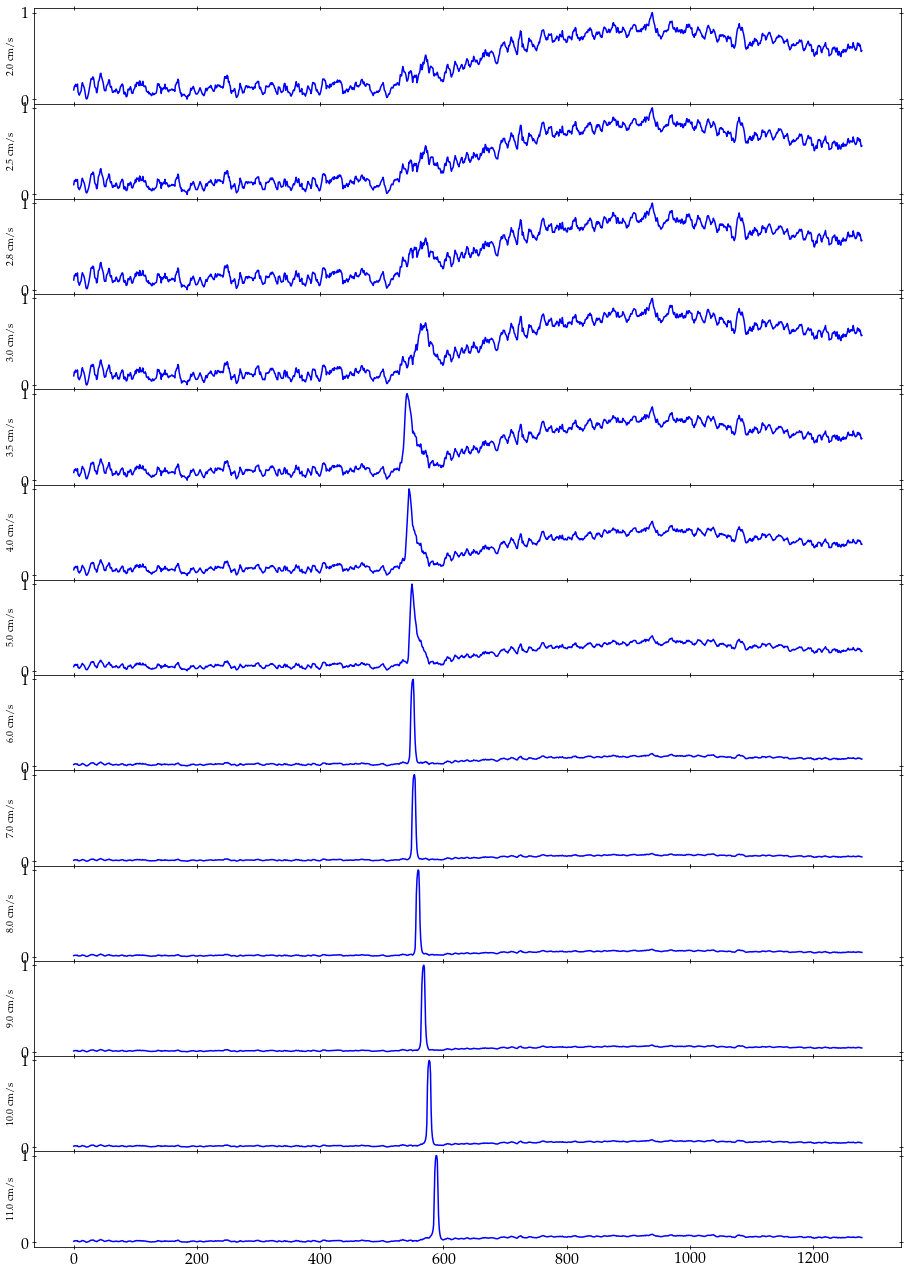

In [43]:
#index of extinction and ignition points
fig, ax = plt.subplots(len(v_f2), sharex=True)
fig.set_size_inches(14, 20)
n = 6  # the larger n is, the smoother curve will be
b = [1.0 / n] * n
a = 1
kk = 1
x_s = np.arange(1280)
xnn = []
n_ign = []
n_ext = []
fff = 4
kkk = 100
for i in range(len(v_f2)):
    seq3 = rp.find_sequence_by('case',v=v_f2[i], phi =1)
    fft2 = rp.perform_analyses(seq3, camera=2, align=False)
    ggg = fft2[h]
    images = {'difference': ggg.without_filament[ch]}
    hdr3 = rp.get_entries(seq3,'hdr2')
    sig= mask(hdr3[h],images['difference'],xs).mean(axis=0)
    #         sig = sig_0[:700]
    y = (lfilter(b, a, sig) - np.amin(lfilter(b, a, sig))) / (
        np.max(lfilter(b, a, sig)) - np.amin(lfilter(b, a, sig)))
    if v_f2[i] <= 15:
#         dy_dx = (y[1:] - y[:-1]) / (x_s[1:] - x_s[:-1])
#         dy_dx1 = norm(dy_dx)
#         x_s1 = x_s[:-1]
#         n_ext.append(np.argmax(dy_dx1[570:605]) + 570 - 1)
#         y1, x_n = M_avg(y, 5)
#         y2 = y1[::kk]
#         x_n1 = x_n[::kk]
#         dy_dx2 = (y2[1:] - y2[:-1]) / (x_n1[1:] - x_n1[:-1])
#         x_n2 = x_n1[:-1]
#         n_zero = zero_cross(dy_dx2[100:1060]) + 100
#         n_ign.append(kk * n_zero)
#         oo = [0, 0]
#         xoo = [0, 1280]
        #             ax[i].plot(x_n2,dy_dx2,'-',kk*n_zero,dy_dx2[n_zero],'o',xoo,oo,'r')
#         print(n_ext[i])
        ax[i].plot(x_s, y, 'b')
#                    , n_ign[i], y[n_ign[i]], 'ro', n_ext[i],
#                    y[n_ext[i]], 'bo')
        ax[i].set_ylabel(str(v_f2[i]) + ' cm/s', fontsize=10)
#     else:
#         for j, k in zip(range(len(test2)), frames2.keys()):
#             pci2 = frames2[k][i]
#             n_ext.append(int(np.argwhere(pci2.pos.x == pci2.x_flame[0])))
#             n_ign.append(int(np.argwhere(pci2.pos.x == pci2.x_flame[2])) + 10)
#             ax[i].plot(x_s, y, 'b', n_ign[i], y[n_ign[i]], 'ro', n_ext[i],
#                        y[n_ext[i]], 'bo')
#             ax[i].set_ylabel(str(v_f2[i]) + ' cm/s', fontsize=10)

### MLE Algorithm

pressure 130.34 psig
pressure 130.34 psig
pressure 130.34 psig
pressure 130.34 psig
pressure 130.34 psig
pressure 130.34 psig
pressure 130.34 psig
pressure 130.34 psig
pressure 130.34 psig
pressure 130.34 psig
pressure 130.34 psig
pressure 130.34 psig
pressure 130.34 psig
pressure 130.34 psig
pressure 130.34 psig
pressure 130.34 psig
pressure 130.34 psig
pressure 130.34 psig
pressure 130.34 psig
pressure 130.34 psig
pressure 130.34 psig
pressure 130.34 psig
pressure 130.34 psig
pressure 130.34 psig


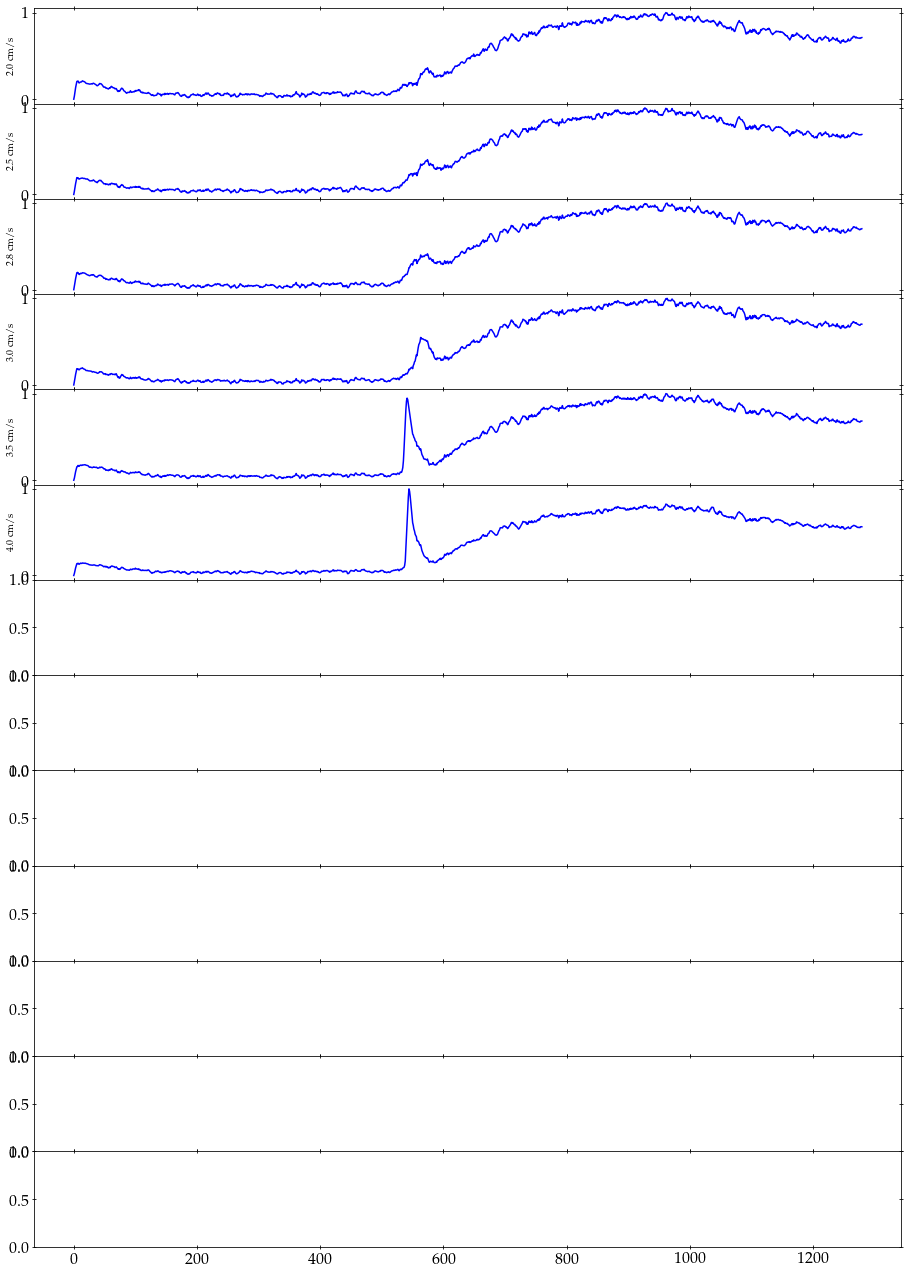

In [44]:
#index of extinction and ignition points
fig, ax = plt.subplots(len(v_f2), sharex=True)
fig.set_size_inches(14, 20)
n = 6  # the larger n is, the smoother curve will be
b = [1.0 / n] * n
a = 1
kk = 1
x_s = np.arange(1280)
xnn = []
n_ign = []
n_ext = []
fff = 4
kkk = 100
for i in range(v_f2):
    im = img.HyperStack.load(
        fname=cases[1]+'.h5',
        path='../fuels',
        group='tube_v' + str(v_f2[i]) + ':cam2')
    hdrm = img.HDR.module('mle', ldr='predicted', camera=IDS)
    hdr_mle, var_mle = hdrm.photon_flux(im)
    seq3 = rp.find_sequence_by('case', v=v_f2[i], phi=1)
    images = {'difference': hdr_mle['f430x10h']}
    hdr3 = rp.get_entries(seq3, 'hdr2')
    sig = mask(hdr3[h], images['difference'], xs).mean(axis=0)
    #         sig = sig_0[:700]
    y = (lfilter(b, a, sig) - np.amin(lfilter(b, a, sig))) / (
        np.max(lfilter(b, a, sig)) - np.amin(lfilter(b, a, sig)))
    if v_f2[i] <= 15:
#         dy_dx = (y[1:] - y[:-1]) / (x_s[1:] - x_s[:-1])
#         dy_dx1 = norm(dy_dx)
#         x_s1 = x_s[:-1]
#         n_ext.append(np.argmax(dy_dx1[570:605]) + 570 - 1)
#         y1, x_n = M_avg(y, 5)
#         y2 = y1[::kk]
#         x_n1 = x_n[::kk]
#         dy_dx2 = (y2[1:] - y2[:-1]) / (x_n1[1:] - x_n1[:-1])
#         x_n2 = x_n1[:-1]
#         n_zero = zero_cross(dy_dx2[100:1060]) + 100
#         n_ign.append(kk * n_zero)
#         oo = [0, 0]
#         xoo = [0, 1280]
        #             ax[i].plot(x_n2,dy_dx2,'-',kk*n_zero,dy_dx2[n_zero],'o',xoo,oo,'r')
#         print(n_ext[i])
        ax[i].plot(x_s, y, 'b')
#                    , n_ign[i], y[n_ign[i]], 'ro', n_ext[i],
#                    y[n_ext[i]], 'bo')
        ax[i].set_ylabel(str(v_f2[i]) + ' cm/s', fontsize=10)
#     else:
#         for j, k in zip(range(len(test2)), frames2.keys()):
#             pci2 = frames2[k][i]
#             n_ext.append(int(np.argwhere(pci2.pos.x == pci2.x_flame[0])))
#             n_ign.append(int(np.argwhere(pci2.pos.x == pci2.x_flame[2])) + 10)
#             ax[i].plot(x_s, y, 'b', n_ign[i], y[n_ign[i]], 'ro', n_ext[i],
#                        y[n_ext[i]], 'bo')
#             ax[i].set_ylabel(str(v_f2[i]) + ' cm/s', fontsize=10)

#### Subtraction of Air and Fuel/Air mixture

In [45]:
import sys, os
# Disable
def blockPrint():
    sys.stdout = open(os.devnull, 'w')
def enablePrint():
    sys.stdout = sys.__stdout__
enablePrint()



100%|██████████████████████████████████████████████████████████████████████████████████| 13/13 [02:00<00:00,  9.29s/it]


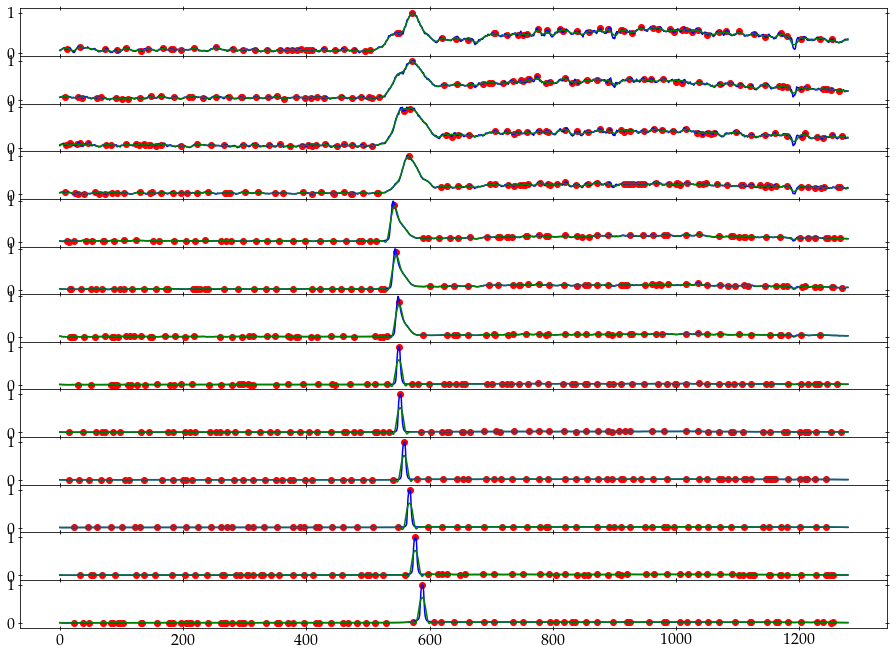

In [55]:
#index of extinction and ignition points
from scipy.signal import savgol_filter
from scipy.signal import argrelextrema
fig, ax = plt.subplots(len(v_f2), sharex=True)
fig.set_size_inches(14, 10)
n = 6  # the larger n is, the smoother curve will be
b = [1.0 / n] * n
a = 1
kk = 1
x_s = np.arange(1280)
xnn = []
n_ign = []
n_ext = []
fff = 4
kkk = 100
for i in range(len(v_f2)):
    im_a = img.HyperStack.load(fname=cases[0] + '.h5',
                               path='../fuels',
                               group='tube_v' + str(v_f2[i]) + ':cam2')
    im = img.HyperStack.load(fname=cases[1] + '.h5',
                             path='../fuels',
                             group='tube_v' + str(v_f2[i]) + ':cam2')

    hdrm = img.HDR.module('mle', ldr='predicted', camera=IDS)
    hdr_mle, var_mle = hdrm.photon_flux(im)
    seq3 = rp.find_sequence_by('case', v=v_f2[i], phi=1)
    images_fuel = {'difference': hdr_mle['f430x10h']}
    sig_fuel = mask(hdr3[h], images_fuel['difference'], xs)
    hdr_mle_a, var_mle_a = hdrm.photon_flux(im_a)
    seq3_a = rp.find_sequence_by('case', v=v_f2[i], phi=0)
    images_air = {'difference': hdr_mle_a['f430x10h']}
    sig_air = mask(hdr3[h], images_air['difference'], xs)
    hdr3 = rp.get_entries(seq3, 'hdr2')
    sig = (sig_fuel - sig_air).mean(axis=0)
    #         sig = sig_0[:700]
    y = (lfilter(b, a, sig) - np.amin(lfilter(b, a, sig))) / (
        np.max(lfilter(b, a, sig)) - np.amin(lfilter(b, a, sig)))
#     y=[i for i in y if i>]
    y_smooth = savgol_filter(y, 21, 2)
    print(len(y_smooth),len(y),len(x_s))
    extrema_max = argrelextrema(y_smooth, np.greater)[0]
#     print(extrema_max)
#     if v_f2[i] <= 15:
        #         dy_dx = (y[1:] - y[:-1]) / (x_s[1:] - x_s[:-1])
        #         dy_dx1 = norm(dy_dx)
        #         x_s1 = x_s[:-1]
        #         n_ext.append(np.argmax(dy_dx1[570:605]) + 570 - 1)
        #         y1, x_n = M_avg(y, 5)
        #         y2 = y1[::kk]
        #         x_n1 = x_n[::kk]
        #         dy_dx2 = (y2[1:] - y2[:-1]) / (x_n1[1:] - x_n1[:-1])
        #         x_n2 = x_n1[:-1]
        #         n_zero = zero_cross(dy_dx2[100:1060]) + 100
        #         n_ign.append(kk * n_zero)
        #         oo = [0, 0]
        #         xoo = [0, 1280]
        #         ax[i].plot(x_n2,dy_dx2,'-',kk*n_zero,dy_dx2[n_zero],'o',xoo,oo,'r')
        #         print(n_ext[i])
    ax[i].plot(x_s, y, 'b',x_s,y_smooth,'g') 
    ax[i].scatter(x_s[extrema_max], y[extrema_max], color='r')
        #, n_ign[i], y[n_ign[i]], 'ro', n_ext[i],
#         #y[n_ext[i]], 'bo')
#         ax[i].set_ylabel(str(v_f2[i]) + ' cm/s', fontsize=10)
#     else:
#         for j, k in zip(range(len(test2)), frames2.keys()):
#             pci2 = frames2[k][i]
#             #             n_ext.append(int(np.argwhere(pci2.pos.x == pci2.x_flame[0])))
#             #             n_ign.append(int(np.argwhere(pci2.pos.x == pci2.x_flame[2])) + 10)
#             ax[i].plot(x_s, y, 'b')  #, n_ign[i], y[n_ign[i]], 'ro', n_ext[i],
#             #                        y[n_ext[i]], 'bo')
#             ax[i].set_ylabel(str(v_f2[i]) + ' cm/s', fontsize=10)

In [47]:
im_a = img.HyperStack.load(fname=cases[1]+'.h5',
                           path='../fuels',
                           group='tube_v' + str(3.0) + ':cam2')

im = img.HyperStack.load(
    fname=cases[1]+'.h5',
    path='../fuels',
    group='tube_v' + str(3.0) + ':cam2')

In [48]:
plt.rcParams['figure.figsize']=[10,2]

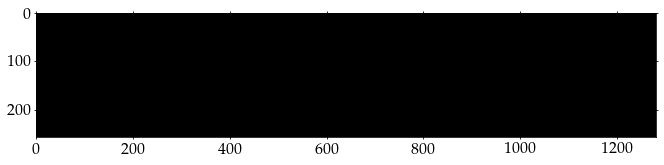

In [49]:
plt.pcolormesh(im['f430x10h'][0, 15, ..., 0]-im_a['f430x10h'][0, 15, ..., 0], cmap='gray')
plt.gca().invert_yaxis()
plt.show()

#### MLE Algorithm

In [50]:
hdrm = img.HDR.module('mle', ldr='predicted', camera=IDS)
hdr_mle, var_mle = hdrm.photon_flux(im)
hdr_mle_a, var_mle_a = hdrm.photon_flux(im_a)

C:\Users\Navid\Miniconda3\lib\site-packages\ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in log
  """Entry point for launching an IPython kernel.
C:\Users\Navid\Miniconda3\lib\site-packages\matplotlib\colors.py:885: UserWarning: Warning: converting a masked element to nan.
  dtype = np.min_scalar_type(value)
C:\Users\Navid\Miniconda3\lib\site-packages\numpy\ma\core.py:713: UserWarning: Warning: converting a masked element to nan.
  data = np.array(a, copy=False, subok=subok)


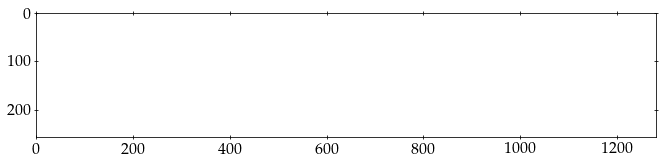

In [51]:
plt.pcolormesh(np.log(hdr_mle['f430x10h']-hdr_mle_a['f430x10h']), cmap='plasma')
plt.gca().invert_yaxis()
plt.show()

#### Debevec Algorithm

In [52]:
hdrd = img.HDR.module('debevec', ldr='predicted', camera=IDS)
hdr_deb, var_deb = hdrd.photon_flux(im)
hdr_deb_a, var_deb_a = hdrd.photon_flux(im_a)

C:\Users\Navid\Miniconda3\lib\site-packages\ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in log
  """Entry point for launching an IPython kernel.


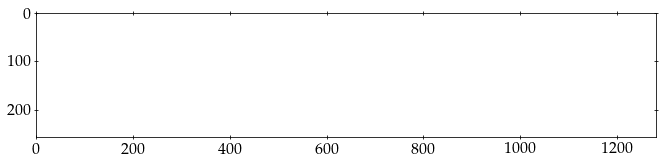

In [53]:
plt.pcolormesh(np.log(hdr_deb['f430x10h']-hdr_deb_a['f430x10h']), cmap='gray')
plt.gca().invert_yaxis()
plt.show()